Exercice 10 - Transformation de données :

- Téléchargez le fichier CSV "student_grades.csv" à partir du lien suivant : https://raw.githubusercontent.com/datasciencedojo/datasets/master/student_grades.csv

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

- Chargez le fichier dans un DataFrame nommé "grades_df".

In [38]:
grades_df = pd.read_csv("files/student_grades.csv")

- Donnez un nom aux colonnes: ['ID','salle','note']

In [39]:
grades_df.columns = ['ID','salle','note']
grades_df

,ID,salle,note
0,401767594,3,B-
1,678665086,4,A+
2,678665086,3,A+
3,553725811,2,C
4,678665086,1,B
5,886308195,1,A
6,103066521,2,C
7,103066521,3,C-
8,821568627,4,D
9,821568627,2,A+


- Ajoutez une colonne note_dec qui contient les notes de 0 à 17 (E- à A+)

In [40]:
arr_signal = ['-','','+']
arr_grades = ['F','E','D','C','B','A']
arr_grades_dec = [f+s for f in arr_grades for s in arr_signal  ]


In [41]:
grades_df['note_dec'] = grades_df['note'].apply(lambda x: arr_grades_dec.index(x))
grades_df

,ID,salle,note,note_dec
0,401767594,3,B-,12
1,678665086,4,A+,17
2,678665086,3,A+,17
3,553725811,2,C,10
4,678665086,1,B,13
5,886308195,1,A,16
6,103066521,2,C,10
7,103066521,3,C-,9
8,821568627,4,D,7
9,821568627,2,A+,17


- Convertissez les notes pour qu’elles soient entre 0 et 20 en appliquant une fonctino

- Ajoutez une colonne "result" qui contiendra "Réussite" pour les étudiants ayant une note supérieure ou égale à 10, sinon "Échec".


In [42]:
# grades_df['result'] = grades_df['note_dec'].apply(lambda x: 'Réussite' if x >=10 else 'Échec')
grades_df['result'] = np.where(grades_df['note_dec']>=10 ,'Réussite','Échec')
grades_df

,ID,salle,note,note_dec,result
0,401767594,3,B-,12,Réussite
1,678665086,4,A+,17,Réussite
2,678665086,3,A+,17,Réussite
3,553725811,2,C,10,Réussite
4,678665086,1,B,13,Réussite
5,886308195,1,A,16,Réussite
6,103066521,2,C,10,Réussite
7,103066521,3,C-,9,Échec
8,821568627,4,D,7,Échec
9,821568627,2,A+,17,Réussite


Utilisez Seaborn pour créer un histogramme représentant la distribution des notes des étudiants.


<Axes: xlabel='note_dec', ylabel='Count'>

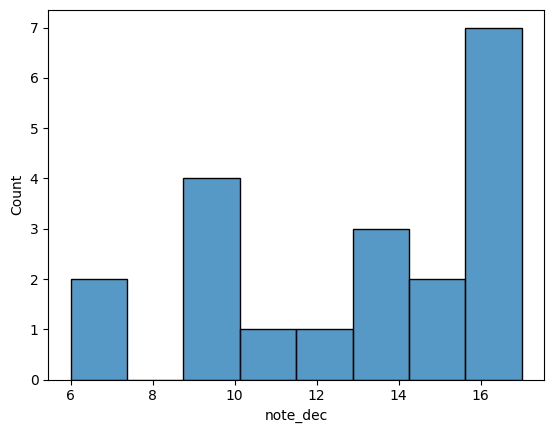

In [56]:
sns.histplot(data=grades_df['note_dec'],bins=8)

Utilisez le DataFrame "grades_df" pour créer un graphique à barres montrant la moyenne des notes des étudiants pour chaque salle.


<Axes: xlabel='note_dec', ylabel='salle'>

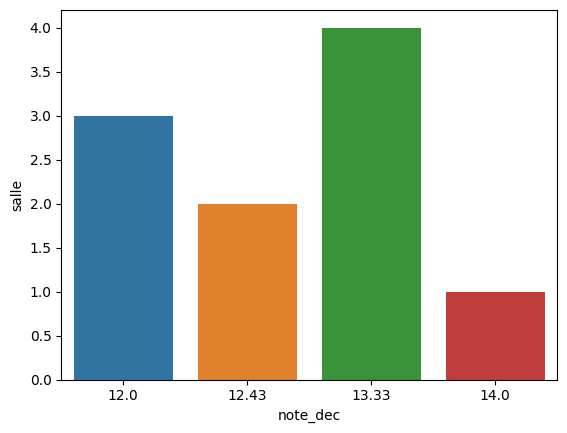

In [91]:
salle_grades_df = grades_df.groupby('salle')['note_dec'].mean().round(2).reset_index()
sns.barplot(data=salle_grades_df,x='note_dec',y='salle')

Utilisez le DataFrame "grades_df" pour créer un graphique à barres montrant le nombre d'étudiants ayant réussi et échoué.


<Axes: xlabel='ID', ylabel='result'>

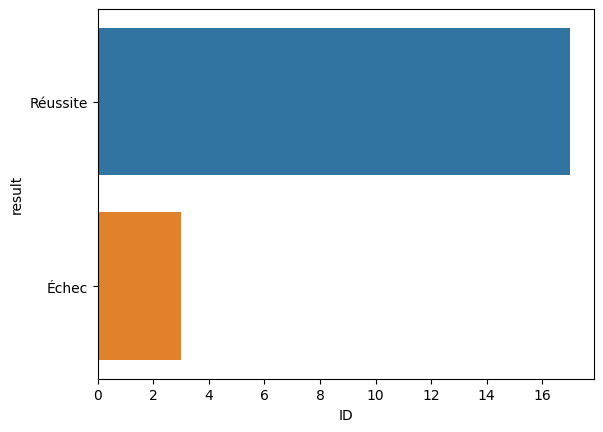

In [90]:
reussite_df = grades_df.groupby('result')['ID'].count().reset_index()
sns.barplot(reussite_df,x='ID',y='result')